<a href="https://colab.research.google.com/github/pikey-msc/RiesgosFinancieros/blob/master/2020-1/Insumos/R_SH_Acciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paso de carga de librerías en R de todas las que se utilizarán

In [0]:
#require(quantmod)
install.packages("quantmod")
library(quantmod)
#require(data.table)
install.packages("data.table")
library(data.table)
#require("PerformanceAnalytics")
install.packages("PerformanceAnalytics")
library("PerformanceAnalytics")

con = gzcon(url('https://github.com/systematicinvestor/SIT/raw/master/sit.gz', 'rb'))
source(con)
close(con)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Attaching package: ‘data.table’

The following objects are masked from ‘package:xts’:

    first, last

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependency ‘quadprog’


Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend

W

Cargamos parámetros para valoración:
	 
   **Pérdidas y Ganancias simulación histórica (sin alisado)**
   
	 Un enfoque más claro es suponer que tenemos:
1.   Una matriz $X_{(n+1)\times m}$ de $m$ factores de riesgo y $n+1$ observaciones. 
2.   Denotemos el vector de precios actual como $X_{00}:=(x_{0,1},x_{0,2},\ldots,x_{0,m})$. 
3.   Sea $r$ el número de instrumentos de un portafolio, entonces cada instrumento tiene una función de valuación $f_i\colon A_i \to R$ para todo $x\in X$, $i=1,\ldots, r$, donde $A_i\subset X_i$ con $\#(A_i)\leq \#(X_i)$.
4.   Sea $r$ el número de instrumentos de un portafolio, entonces cada instrumento tiene una función de valuación $f_i\colon A_i \to R$ para todo $x\in X$, $i=1,\ldots, r$, donde $A_i\subset X_i$ con $\#(A_i)\leq \#(X_i)$.
5.   Sea $M_{1\times r}=(m_1,\ldots,m_r)$ el vector de posiciones nominales de cada instrumento, es decir, el número de contratos que se tienen por instrumento $m_i\in R$ $(i=1,\ldots,r)$.

In [0]:

#Cargar los símbolos de yahoo finance para EQ
Symbols<-c  ( "GCARSOA1.MX", "WALMEX.MX" )#tienen que ir en orden alfabético
pos_eq=c(1000,2000) #monto inicial invertido en acciones
#Cargar los símbolos de yahoo finance para FX
SymbolsFX<-c("EURUSD=X","GBPUSD=X","USDMXN=X" ) #tienen que ir en orden alfabético
pos_fx=c(1000,-500,200) #monto inicial invertido en divisas
nh=3660 #días de historia

pos=cbind(t(pos_fx),t(pos_eq))


Ahora definimos el "*environment*"

In [0]:
start_date=Sys.Date()-nh #fecha inicial

#Creación del objeto para guardar los datos
dataEnv<-new.env()
dataEnvFX<-new.env()

#obtener los datos
getSymbols.yahoo(Symbols,env=dataEnv,from=start_date)
getSymbols.yahoo(SymbolsFX,env=dataEnvFX,from=start_date)

#muestra
tail(dataEnvFX$`GBPUSD=X`)



Warning message:
“GCARSOA1.MX contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”Warning message:
“WALMEX.MX contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”

[1] "GCARSOA1.MX" "WALMEX.MX"

Warning message:
“EURUSD=X contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”Warning message:
“GBPUSD=X contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”Warning message:
“USDMXN=X contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”

[1] "EURUSD=X" "GBPUSD=X" "USDMXN=X"

           GBPUSD=X.Open GBPUSD=X.High GBPUSD=X.Low GBPUSD=X.Close
2019-07-26      1.245377      1.245951     1.237777       1.245345
2019-07-29      1.237777      1.238390     1.221598       1.237670
2019-07-30      1.221747      1.222016     1.212106       1.221747
2019-07-31      1.215791      1.224680     1.214727       1.216160
2019-08-01      1.215466      1.215466     1.208196       1.215377
2019-08-02      1.212724      1.214491     1.209175       1.212430
           GBPUSD=X.Volume GBPUSD=X.Adjusted
2019-07-26               0          1.245345
2019-07-29               0          1.237670
2019-07-30               0          1.221747
2019-07-31               0          1.216160
2019-08-01               0          1.215377
2019-08-02               0          1.212430

Limpiamos NA's y nos quedamos con los precios de cierre

In [0]:
#limpiarlos, alinearnos y quedarnos con el precio de cierre 

bt.prep(dataEnv,align='remove.na',fill.gaps = T)
bt.prep(dataEnvFX,align='remove.na',fill.gaps=T)

#muestra de datos
head(dataEnv$prices)
head(dataEnvFX$prices)

#muestra de datos
head(dataEnv$prices)
head(dataEnvFX$prices)


#Nos quedamos con los precios
stock_prices = dataEnv$prices
tail(stock_prices[,])



stock_pricesFX=dataEnvFX$prices
tail(stock_pricesFX)



           GCARSOA1.MX WALMEX.MX
2009-07-27     19.8494    21.930
2009-07-28     20.2797    21.970
2009-07-29     19.9619    21.785
2009-07-30     20.4850    21.920
2009-07-31     21.0228    22.510
2009-08-03     22.2940    23.295

           EURUSD=X GBPUSD=X USDMXN=X
2009-07-27 1.424704 1.648533  13.2642
2009-07-28 1.414607 1.641093  13.2195
2009-07-29 1.401463 1.635109  13.2525
2009-07-30 1.408490 1.650792  13.2522
2009-07-31 1.426005 1.670509  13.1490
2009-08-03 1.441192 1.694111  13.0870

           GCARSOA1.MX WALMEX.MX
2009-07-27     19.8494    21.930
2009-07-28     20.2797    21.970
2009-07-29     19.9619    21.785
2009-07-30     20.4850    21.920
2009-07-31     21.0228    22.510
2009-08-03     22.2940    23.295

           EURUSD=X GBPUSD=X USDMXN=X
2009-07-27 1.424704 1.648533  13.2642
2009-07-28 1.414607 1.641093  13.2195
2009-07-29 1.401463 1.635109  13.2525
2009-07-30 1.408490 1.650792  13.2522
2009-07-31 1.426005 1.670509  13.1490
2009-08-03 1.441192 1.694111  13.0870

           GCARSOA1.MX WALMEX.MX
2019-07-26       60.63     56.23
2019-07-29       63.76     56.82
2019-07-30       63.97     56.57
2019-07-31       61.81     56.54
2019-08-01       61.05     56.61
2019-08-02       62.29     55.88

           EURUSD=X GBPUSD=X USDMXN=X
2019-07-26 1.114616 1.245345  19.0262
2019-07-29 1.113214 1.237670  19.0310
2019-07-30 1.114305 1.221747  19.0467
2019-07-31 1.115797 1.216160  19.0554
2019-08-01 1.107175 1.215377  19.1365
2019-08-02 1.107886 1.212430  19.2103

Cambiar moneda a pesos mexicanos, identificar 

In [0]:
#cambiar todo a pesos mexicanos
stock_pricesFX=cbind(stock_pricesFX[,1,with=F]*stock_pricesFX[,3,with=F],stock_pricesFX[,2,with=F]*stock_pricesFX[,3,with=F],stock_pricesFX[,3,with=F])
tail(stock_pricesFX)

stock_prices_EQFX=merge(stock_pricesFX,stock_prices,join = "inner")
#stock_prices_EQFX
tail(stock_prices_EQFX)


#Preciso actuales
#x0=as.data.table(as.matrix(stock_prices_EQFX[nrow(stock_prices_EQFX),])) #valores actuales
x0=stock_prices_EQFX[nrow(stock_prices_EQFX),]
x0


           EURUSD.X GBPUSD.X USDMXN.X
2019-07-26 21.20691 23.69418  19.0262
2019-07-29 21.18558 23.55410  19.0310
2019-07-30 21.22383 23.27025  19.0467
2019-07-31 21.26196 23.17442  19.0554
2019-08-01 21.18745 23.25806  19.1365
2019-08-02 21.28282 23.29114  19.2103

           EURUSD.X GBPUSD.X USDMXN.X GCARSOA1.MX WALMEX.MX
2019-07-26 21.20691 23.69418  19.0262       60.63     56.23
2019-07-29 21.18558 23.55410  19.0310       63.76     56.82
2019-07-30 21.22383 23.27025  19.0467       63.97     56.57
2019-07-31 21.26196 23.17442  19.0554       61.81     56.54
2019-08-01 21.18745 23.25806  19.1365       61.05     56.61
2019-08-02 21.28282 23.29114  19.2103       62.29     55.88

           EURUSD.X GBPUSD.X USDMXN.X GCARSOA1.MX WALMEX.MX
2019-08-02 21.28282 23.29114  19.2103       62.29     55.88


Paso 1. (Generación de rendimientos) Construir ${\Delta X}_{n\times m}$ que es la matriz de diferencias basados en el operador $T_j$, es decir
		$${\Delta X}_t=\Big[ T_j(\frac{x_{t,1}}{x_{t+1,1}}), T_j(\frac{x_{t,2}}{x_{t+1,2}}),\ldots, T_j(\frac{x_{t,m}}{x_{t+1,m}})\Big]\quad t=0,1,\ldots, n-1.$$

In [0]:

stock_returns = Return.calculate(stock_prices_EQFX, method = c("discrete"))
head(stock_returns[,1:3])

#CONFIRMACIÓN
DeltaX=as.matrix(log(as.matrix(stock_prices_EQFX[2:nrow(stock_prices_EQFX)])/as.data.table(as.matrix(stock_prices_EQFX[1:(nrow(stock_prices_EQFX)-1)]))))
#tail(DeltaX)
head(DeltaX)

               EURUSD.X     GBPUSD.X      USDMXN.X
2009-07-27           NA           NA            NA
2009-07-28 -0.010433176 -0.007867868 -3.369973e-03
2009-07-29 -0.006818509 -0.001159140  2.496312e-03
2009-07-30  0.004991295  0.009568555 -2.263724e-05
2009-07-31  0.004551078  0.004063565 -7.787386e-03
2009-08-03  0.005884628  0.009346821 -4.715187e-03

EURUSD.X,GBPUSD.X,USDMXN.X,GCARSOA1.MX,WALMEX.MX
-0.010487983,-0.007898983,-3.375664e-03,0.021446556,0.001822278
-0.006841861,-0.001159813,2.493202e-03,-0.015794830,-0.008456181
0.004978880,0.009523066,-2.263749e-05,0.025867453,0.006177803
0.004540753,0.004055331,-7.817866e-03,0.025914603,0.026560193
0.005867382,0.009303410,-4.726339e-03,0.058710066,0.034279090
0.003752830,0.003982327,3.219386e-03,0.001093777,-0.006892123


Análisis gráfico

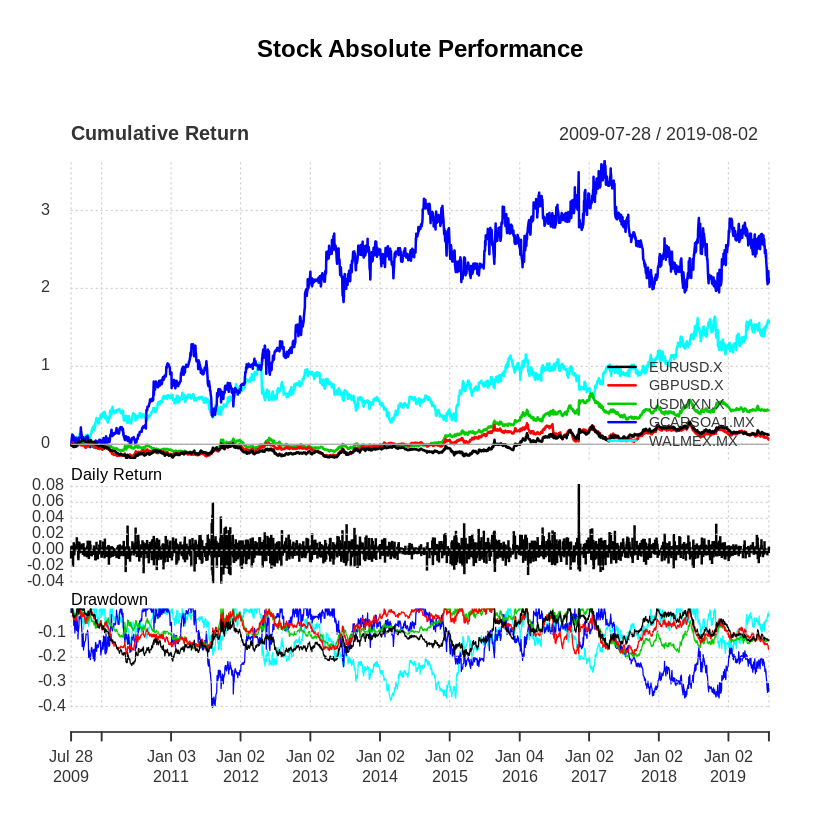

In [0]:
charts.PerformanceSummary(stock_returns,main='Stock Absolute Performance',legend.loc="bottomright")


Paso 2. Construir ${X^\ast}_{n\times m}$ que es la matriz de factores de riesgo simulada basada en el vector de precios actual $X_{00}$
		$$X_{t}^\ast=\Big[x_{0,1}T^{-1}_j(\Delta x_{t,1}), x_{0,2}T^{-1}_j(\Delta x_{t,2}),\ldots, x_{0,m}T^{-1}_j(\Delta x_{t,m})\Big]\quad (t=1,\ldots,n\quad j=1,2),$$
		donde $T_1(x)=\ln(x)$, $T_2(x)=x-1$.

Paso 3. Construcción de la matriz de reevaluación del portafolio basada en los escenarios históricos $Y_{n\times r}$ de todos los instrumentos financieros, es decir
		$$Y_t=[m_1f_1(X_{t}^\ast), m_2f_2(X_{t}^\ast),\ldots, m_rf_r(X_{t}^\ast)]\quad (t=1,\ldots,n).$$
    
Paso 4. Construcción de la matriz de pérdidas y ganancias del portafolio basada en los escenarios históricos $\Delta Y_{n\times r}$ de todos los instrumentos financieros, es decir
		$$\Delta Y_t=Y_0-Y_{t}=[m_1(f_1(X_{00})-f_1(X_{t}^\ast)), m_2( f_2(X_{00})-f_2(X_{t}^\ast)),\ldots, m_r(f_r(X_{00})-f_r(X_{t}^\ast))],$$
		para $(t=1,\ldots,n)$. Se puede obtener el vector de pérdidas totales ${\Delta YT}_{n\times m}$ muy fácilmente, esto es $\Delta YT=\sum_{k=1}^r Y_{kt}$ $(t=1,\ldots,n)$, incluso se puede hacer lo mismo por tipo de riesgo.


In [0]:
n=nrow(DeltaX)
n
m=ncol(DeltaX)
m


V0=x0*pos #Valor del portafolio
V0
VT=sum(V0)
sum(V0)
#Cálculo de Distribución de Pérdidas y Ganancias
X_ast<-matrix(0,n,m) #matriz de simulacion de precios
Y_ast<-matrix(0,n,m) #matriz de simulacion de precios
PL<-matrix(0,n,m) 
PLTdCAcc<-matrix(0,n,2) #POR FACTOR DE RIESGO
PLT=matrix(0,n,1) #TOTAL
for (i in (1:n))
{
  X_ast[i,]=x0*exp(DeltaX[i,]) #Simulación del precio
  Y_ast[i,]=X_ast[i,]*pos
  PL[i,]=Y_ast[i,]-V0  #Pérdidas y ganancias por posición
  PLTdCAcc[i,]=c(sum(PL[i,1:(len(pos_fx))]),sum(PL[i,(len(pos_fx)+1):(len(pos_eq)+len(pos_fx))])) #Pérdidas y ganancias por factor de riesgo
  PLT[i]=sum(PL[i,]) #Pérdidas y ganancias totales
}
PL[1:10,]
PLTdCAcc[1:10,]
PLT[1:10,]


[1] 2511

[1] 5

           EURUSD.X  GBPUSD.X USDMXN.X GCARSOA1.MX WALMEX.MX
2019-08-02 21282.82 -11645.57  3842.06       62290    111760

[1] 187529.3

-222.04744,91.62582,-12.94763966,1350.33427,203.8435
-145.11712,13.49885,9.59098150,-976.13075,-941.0783
106.22885,-111.43130,-0.08697363,1632.30443,692.5683
96.85979,-47.32254,-29.91960520,1635.31846,3008.1387
125.24150,-108.84908,-18.11603316,3766.53498,3897.4501
80.02087,-46.46894,12.38900680,68.16863,-767.6154
-168.00377,56.91020,-28.23925220,-231.92689,1280.1556
-47.42355,122.14270,1.76880923,-1671.03595,-2722.3590
-444.59103,183.02227,-32.03018108,1041.48958,2716.8989
-139.09567,170.61346,-8.91429234,-276.90263,3369.2881


-143.369255,1554.1778
-122.027283,-1917.2090
-5.289420,2324.8727
19.617643,4643.4572
-1.723612,7663.9851
45.940935,-699.4468
-139.332827,1048.2287
76.487960,-4393.3950
-293.598942,3758.3884
22.603504,3092.3854


[1]  1410.8085 -2039.2363  2319.5833  4663.0748  7662.2615  -653.5058
 [7]   908.8959 -4316.9070  3464.7895  3114.9889

Paso 5. Obtenerla medida de riesgo basado en un nivel de confianza de la matriz ${\Delta Y}_{\cdot k}$ $(k=1,\ldots,r)$ y $\Delta YT$.

Las pérdidas y ganancias vía simulación histórica sin alisado es donde se ponderan los escenarios históricos con un mismo peso para todos, es decir cada escenario tiene una probabilidad de ocurrencia de $1/n$.

In [0]:
#VaR por posición sin alisado
VaRCont=matrix(0,1,m)
CVaRCont=matrix(0,1,m)
alpha=0.95


for (i in (1:m))
{
VaRCont[i]=quantile(PL[,i],1-alpha,n)
CVaRCont[i]= mean(PL[which(PL[,i]<VaRCont[i]),i])
}

#Resumen medidas de riesgo por posición
VaRCont=as.data.table(VaRCont)
CVaRCont=as.data.table(CVaRCont)

#valores absolutos con respecto al portafolio sin alisado
names(VaRCont)=names(x0)
names(CVaRCont)=names(x0)
VaRCont/abs(as.matrix(V0))
CVaRCont/abs(as.matrix(V0))


#medias de riesgo por factor de riesgo acciones y divisas

VaRfr=matrix(0,1,2)
CVaRfr=matrix(0,1,2)

for (i in (1:2))
{
  VaRfr[i]=quantile(PLTdCAcc[,i],1-alpha,n)
  CVaRfr[i]= mean(PLTdCAcc[which(PLTdCAcc[,i]<VaRfr[i]),i])
}



VaRfr=as.data.table(VaRfr)
CVaRfr=as.data.table(CVaRfr)

names(VaRfr)=c("divisas", "acciones")
names(CVaRfr)=c("divisas", "acciones")
#VALORES ABSOLUTOS
VaRfr/c(abs(as.matrix(sum(V0[,1:(len(pos_fx)+1)]))),abs(as.matrix(sum(V0[,(len(pos_fx)+1):(len(pos_eq)+len(pos_fx))]))))
CVaRfr/c(abs(as.matrix(sum(V0[,1:(len(pos_fx)+1)]))),abs(as.matrix(sum(V0[,(len(pos_fx)+1):(len(pos_eq)+len(pos_fx))]))))


#hist(as.matrix(PL[,3]))
#hist(as.matrix(PL[,2]))


#VaR Total
VaRTotal=quantile(PLT,1-alpha,n)
CVaRTotal= mean(PLT[which(PLT<VaRTotal),])

#VALOR ABSOLUTOS
VaRTotal
CVaRTotal
VaRTotal/sum(V0)
CVaRTotal/sum(V0)

EURUSD.X,GBPUSD.X,USDMXN.X,GCARSOA1.MX,WALMEX.MX
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.01461091,-0.01404002,-0.0112768,-0.03095847,-0.02239119


EURUSD.X,GBPUSD.X,USDMXN.X,GCARSOA1.MX,WALMEX.MX
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.01978291,-0.01973321,-0.01571689,-0.04389998,-0.03367569


divisas,acciones
<dbl>,<dbl>
-0.002944905,-0.02026938


divisas,acciones
<dbl>,<dbl>
-0.003946224,-0.03037323


5% 
-3403.572

[1] -5216.771

5% 
-0.01814954

[1] -0.02781843

Para las pérdidas y ganancias vía simulación histórica con alisado, se siguen los mismos pasos que en las pérdidas y ganancias sin alisado, pero no se le da el mismo peso a los escenarios, comúnmente en este método se ponderan más los escenarios más recientes y se les da menos peso a los más viejos, utilizando la función:
	$$w_i=\lambda^{i-1}w_1\quad (i=1,\ldots,n),$$
	\vskip-0.05cm donde se tienen que estimar las constantes $\lambda\in(0,1)$ y $w_1\in(0,1)$ tal que $\sum_{i=1}^n\lambda^i w_1=1$. 
	Donde $w_i$ representa la probabilidad del escenario más reciente, y $\lambda$ la constante que indica que tanto decrece la probabilidad inicial con respecto al escenario $i$, si $\lambda$ tiende a 1, no existe decrecimiento, si $\lambda$ tiende a cero, el decrecimiento es casi inmediato.
  
Ya que se tiene los valores $w_i$ se ordena la matriz $\Delta Y$ de menor a mayor y se obtiene el percentil que se desee basado en la distribución $w_i$.
  
Para resolver el valor de $\lambda$, sabemos de inicio que $0<\lambda<1$ entonces la expresión $\sum_{i=1}^n\lambda^i w_1=1$ es una serie geométrica por lo que al resolverla tenemos que $w_1(1-\lambda^{n-1})/(1-\lambda)=1$ por lo que finalmente tenemos que encontrar una:

  $\lambda$ que cumpla que $w_1(1-\lambda^{n-1})/(1-\lambda)-1=0$ dado un $w_1$ fijo.	


In [0]:
#Medidas de riesgo CON alisado

#Se necesita definir
#1) El valor del peso inicial del primer escenario "w0"
#2) La función de cuantil con vector de probabilidades no iguales
#3) La función de CVaR con probabilidades no iguales

w0=0.05

#Creación de dos funciones que sirven para este fin
# Percentil con pesos de probabilidades
# 
# v  un vector de observaciones
# w Un vector numérico de valores positivos, en general es la distrubición.
# p  el valor de la probabilidad entre 0 y 1.
# 
# Esta función no interpola

wquantile <- function(v,w=rep(1,length(v)),p=.5) 
{ 
  if ( !is.numeric(w) || length(v) != length(w) ) 
    stop("Los valores y los pesos tienen que tener misma longitud") 
  if ( !is.numeric(p) || any( p<0 | p>1) ) 
    stop("Percentil tiene que ser 0<=p<=1") 
  if ( min(w) < 0 ) stop("Los pesos tiene que ser mayores que 0") 
  ranking <- order(v) 
  sumw <- cumsum(w[ranking]) 
  plist <- sumw / sumw[ length(sumw) ] 
  v [ ranking [ which.max( plist >= p ) ] ]  
} 

#CVaR con alisado
wcvar <- function(v,w=rep(1,length(v)),p=.5) 
{ 
  if ( !is.numeric(w) || length(v) != length(w) ) 
    stop("Los valores y los pesos tienen que tener misma longitud") 
  if ( !is.numeric(p) || any( p<0 | p>1) ) 
    stop("Percentil tiene que ser 0<=p<=1") 
  if ( min(w) < 0 ) stop("Los pesos tiene que ser mayores que 0") 
  ranking <- order(v) 
  sumw <- cumsum(w[ranking]) 
  plist <- sumw / sumw[ length(sumw) ] 
  loss= v [ ranking [ which( plist < p ) ] ]  
  esc=w [ ranking [ which( plist < p ) ] ]  
  sum(loss*esc)/(sum(esc))
} 


#esc_cvar=which(cumsum(p_esc[order(PLT[,1])])<pdca)


#p_esc[esc_cvar]

#tshs=cbind(PLT,p_esc)
